### Need to change cells:
* Calculate factors
* Calculating Factor's Values
* Plotting Prices and Factor's values

In [692]:
import pandas as pd
import os
import time
import patoolib
import gzip
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import openpyxl

In [694]:
patoolib.extract_archive(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz", 
                         outdir=r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\")

patool: Extracting L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz ...
patool: running "C:\Program Files\7-Zip\7z.EXE" e -oL:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\ -- L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz


PatoolError: Command `['C:\\Program Files\\7-Zip\\7z.EXE', 'e', '-oL:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\\\', '--', 'L:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\EURUSD.pkl.gz']' returned non-zero exit status 255

In [ ]:
df = pd.read_pickle(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl")
analyzed_df = df["2018-02"]

### Inspecting one day

In [ ]:
analyzed_df["2018-02-23 09:06:58":"2018-02-23 09:07:02"]

In [ ]:
df["Trading_date_Actual_DateTime"].value_counts()

## Selecting Date and Size

In [695]:
class Trade_Size:
    size = 20000

trading_date = "2018-03"

start_date = "2018-03-01"
end_date = "2018-05-31"

filter_days = []
filter_hours = range(0,24)
filter_mins = []
filter_secs = []

#analyzed_df = df[trading_date]
analyzed_df = df.loc[start_date:end_date,:]
analyzed_df.head()

Open      High       Low     Close Trading_date_Date  \
DateTime_UTC                                                                    
2018-03-01 00:00:00  1.219175  1.219175  1.219150  1.219175               NaN   
2018-03-01 00:00:01  1.219175  1.219175  1.219175  1.219175               NaN   
2018-03-01 00:00:02  1.219175  1.219175  1.219100  1.219100               NaN   
2018-03-01 00:00:03  1.219100  1.219125  1.219100  1.219125               NaN   
2018-03-01 00:00:04  1.219125  1.219125  1.219125  1.219125               NaN   

                    Trading_date_Actual_Time Trading_date_Actual_DateTime  \
DateTime_UTC                                                                
2018-03-01 00:00:00                 00:00:00                         nan    
2018-03-01 00:00:01                 00:00:01                         nan    
2018-03-01 00:00:02                 00:00:02                         nan    
2018-03-01 00:00:03                 00:00:03                         nan    
2018-03-01 00:00:04                 00:00:04                         nan    

                    Trading_date_Sequential_Time  \
DateTime_UTC                                       
2018-03-01 00:00:00                     01:45:00   
2018-03-01 00:00:01                     01:45:01   
2018-03-01 00:00:02                     01:45:02   
2018-03-01 00:00:03                     01:45:03   
2018-03-01 00:00:04                     01:45:04   

                    Trading_date_Sequential_DateTime  \
DateTime_UTC                                           
2018-03-01 00:00:00                             nan    
2018-03-01 00:00:01                             nan    
2018-03-01 00:00:02                             nan    
2018-03-01 00:00:03                             nan    
2018-03-01 00:00:04                             nan    

                     Trading_date_Sequential_#_Secs  
DateTime_UTC                                         
2018-03-01 00:00:00                            6301  
2018-03-01 00:00:01                            6302  
2018-03-01 00:00:02                            6303  
2018-03-01 00:00:03                            6304  
2018-03-01 00:00:04                            6305

### Resampling into 1 Minute bars

In [696]:
min_1_low = analyzed_df.loc[:,"Low"].resample("5T").apply(np.min)
min_1_high = analyzed_df.loc[:,"High"].resample("5T").apply(np.max)
min_1_open = analyzed_df.loc[:,"Open"].resample("5T").first()
min_1_close = analyzed_df.loc[:,"Close"].resample("5T").last()
min_1_Trading_date_Actual_Time = analyzed_df.loc[:,"Trading_date_Actual_Time"].resample("5T").first()
min_1_Trading_date_Sequential_Time = analyzed_df.loc[:,"Trading_date_Sequential_Time"].resample("5T").first()

min_1_analyzed_df = pd.DataFrame.from_dict({"Open":min_1_open,"High":min_1_high,"Low":min_1_low,"Close":min_1_close,
                                        "Trading_date_Actual_Time":min_1_Trading_date_Actual_Time,
                                        "Trading_date_Sequential_Time":min_1_Trading_date_Sequential_Time})

min_1_analyzed_df.head()

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-01 00:00:00  1.219175  1.219225  1.219050  1.219175   
2018-03-01 00:05:00  1.219175  1.219425  1.219075  1.219275   
2018-03-01 00:10:00  1.219275  1.219400  1.219225  1.219375   
2018-03-01 00:15:00  1.219375  1.219375  1.218550  1.218725   
2018-03-01 00:20:00  1.218725  1.218950  1.218525  1.218575   

                    Trading_date_Actual_Time Trading_date_Sequential_Time  
DateTime_UTC                                                               
2018-03-01 00:00:00                 00:00:00                     01:45:00  
2018-03-01 00:05:00                 00:05:00                     01:50:00  
2018-03-01 00:10:00                 00:10:00                     01:55:00  
2018-03-01 00:15:00                 00:15:00                     02:00:00  
2018-03-01 00:20:00                 00:20:00                     02:05:00

### Calculate factors

In [697]:
min_1_analyzed_df["Middle_Band"] = min_1_analyzed_df["Close"].rolling(20).mean()
min_1_analyzed_df["Upper_Band"] = min_1_analyzed_df["Middle_Band"] + (min_1_analyzed_df["Close"].rolling(20).std()*2)
min_1_analyzed_df["Lower_Band"] = min_1_analyzed_df["Middle_Band"] - (min_1_analyzed_df["Close"].rolling(20).std()*2)
min_1_analyzed_df["Prev_Lower_Band"] = min_1_analyzed_df["Lower_Band"].shift(1)
min_1_analyzed_df["Prev_Upper_Band"] = min_1_analyzed_df["Upper_Band"].shift(1)
min_1_analyzed_df["Is_Prev_Cndl_Up"] = ((min_1_analyzed_df["Close"].shift(1) - min_1_analyzed_df["Open"].shift(1)) >= 0)
min_1_analyzed_df["Five_per_std"] = min_1_analyzed_df["Close"].rolling(5).std()
min_1_analyzed_df["Prev_High"] = min_1_analyzed_df["High"].shift(1)
min_1_analyzed_df["Prev_Low"] = min_1_analyzed_df["Low"].shift(1)
min_1_analyzed_df["Seventy_SMA"] = min_1_analyzed_df["Close"].rolling(70).mean()
min_1_analyzed_df["Prev_5_Per_Seventy_SMA"] = min_1_analyzed_df["Seventy_SMA"].shift(5)
# min_1_analyzed_df["SMA10_vs_SMA20"] = min_1_analyzed_df["SMA10"] - min_1_analyzed_df["SMA20"]
# min_1_analyzed_df["SMA10_vs_SMA20_Shifted"] = min_1_analyzed_df["SMA10_vs_SMA20"].shift(1)
min_1_analyzed_df.head(25)

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-01 00:00:00  1.219175  1.219225  1.219050  1.219175   
2018-03-01 00:05:00  1.219175  1.219425  1.219075  1.219275   
2018-03-01 00:10:00  1.219275  1.219400  1.219225  1.219375   
2018-03-01 00:15:00  1.219375  1.219375  1.218550  1.218725   
2018-03-01 00:20:00  1.218725  1.218950  1.218525  1.218575   
2018-03-01 00:25:00  1.218575  1.218675  1.218375  1.218575   
2018-03-01 00:30:00  1.218575  1.218825  1.218375  1.218475   
2018-03-01 00:35:00  1.218475  1.218725  1.218475  1.218725   
2018-03-01 00:40:00  1.218725  1.218925  1.218525  1.218600   
2018-03-01 00:45:00  1.218600  1.218725  1.218375  1.218525   
2018-03-01 00:50:00  1.218525  1.218950  1.218525  1.218875   
2018-03-01 00:55:00  1.218875  1.218950  1.218625  1.218925   
2018-03-01 01:00:00  1.218925  1.219100  1.218800  1.219025   
2018-03-01 01:05:00  1.219025  1.219075  1.218775  1.218775   
2018-03-01 01:10:00  1.218775  1.219150  1.218775  1.218825   
2018-03-01 01:15:00  1.218825  1.219150  1.218775  1.219100   
2018-03-01 01:20:00  1.219100  1.219175  1.218925  1.218925   
2018-03-01 01:25:00  1.218925  1.218950  1.218575  1.218675   
2018-03-01 01:30:00  1.218675  1.218675  1.218425  1.218600   
2018-03-01 01:35:00  1.218600  1.218825  1.218600  1.218700   
2018-03-01 01:40:00  1.218700  1.218975  1.218575  1.218975   
2018-03-01 01:45:00  1.218975  1.219225  1.218875  1.219175   
2018-03-01 01:50:00  1.219175  1.219175  1.218975  1.219125   
2018-03-01 01:55:00  1.219125  1.219275  1.219075  1.219175   
2018-03-01 02:00:00  1.219175  1.219275  1.218925  1.218975   

                    Trading_date_Actual_Time Trading_date_Sequential_Time  \
DateTime_UTC                                                                
2018-03-01 00:00:00                 00:00:00                     01:45:00   
2018-03-01 00:05:00                 00:05:00                     01:50:00   
2018-03-01 00:10:00                 00:10:00                     01:55:00   
2018-03-01 00:15:00                 00:15:00                     02:00:00   
2018-03-01 00:20:00                 00:20:00                     02:05:00   
2018-03-01 00:25:00                 00:25:00                     02:10:00   
2018-03-01 00:30:00                 00:30:00                     02:15:00   
2018-03-01 00:35:00                 00:35:00                     02:20:00   
2018-03-01 00:40:00                 00:40:00                     02:25:00   
2018-03-01 00:45:00                 00:45:00                     02:30:00   
2018-03-01 00:50:00                 00:50:00                     02:35:00   
2018-03-01 00:55:00                 00:55:00                     02:40:00   
2018-03-01 01:00:00                 01:00:00                     02:45:00   
2018-03-01 01:05:00                 01:05:00                     02:50:00   
2018-03-01 01:10:00                 01:10:00                     02:55:00   
2018-03-01 01:15:00                 01:15:00                     03:00:00   
2018-03-01 01:20:00                 01:20:00                     03:05:00   
2018-03-01 01:25:00                 01:25:00                     03:10:00   
2018-03-01 01:30:00                 01:30:00                     03:15:00   
2018-03-01 01:35:00                 01:35:00                     03:20:00   
2018-03-01 01:40:00                 01:40:00                     03:25:00   
2018-03-01 01:45:00                 01:45:00                     03:30:00   
2018-03-01 01:50:00                 01:50:00                     03:35:00   
2018-03-01 01:55:00                 01:55:00                     03:40:00   
2018-03-01 02:00:00                 02:00:00                     03:45:00   

                     Middle_Band  Upper_Band  Lower_Band  Prev_Lower_Band  \
DateTime_UTC                                                                
2018-03-01 00:00:00          NaN         NaN         NaN              NaN   
2018-03-01 0

In [698]:
min_1_analyzed_df.dropna(inplace=True)
min_1_analyzed_df.head(35)

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-01 06:10:00  1.218875  1.218975  1.218775  1.218875   
2018-03-01 06:15:00  1.218875  1.219325  1.218775  1.219275   
2018-03-01 06:20:00  1.219275  1.219375  1.219075  1.219375   
2018-03-01 06:25:00  1.219375  1.219525  1.219225  1.219425   
2018-03-01 06:30:00  1.219425  1.219525  1.219200  1.219375   
2018-03-01 06:35:00  1.219375  1.219575  1.219225  1.219300   
2018-03-01 06:40:00  1.219300  1.219325  1.219175  1.219225   
2018-03-01 06:45:00  1.219225  1.219625  1.219175  1.219600   
2018-03-01 06:50:00  1.219600  1.220525  1.219475  1.220275   
2018-03-01 06:55:00  1.220275  1.220625  1.220275  1.220575   
2018-03-01 07:00:00  1.220575  1.221125  1.220275  1.220925   
2018-03-01 07:05:00  1.220925  1.221050  1.220625  1.220725   
2018-03-01 07:10:00  1.220725  1.220950  1.219975  1.220475   
2018-03-01 07:15:00  1.220475  1.220850  1.220175  1.220425   
2018-03-01 07:20:00  1.220425  1.221075  1.220375  1.220975   
2018-03-01 07:25:00  1.220975  1.221325  1.220825  1.220825   
2018-03-01 07:30:00  1.220825  1.221025  1.220600  1.220775   
2018-03-01 07:35:00  1.220775  1.220975  1.220425  1.220450   
2018-03-01 07:40:00  1.220450  1.220925  1.220425  1.220875   
2018-03-01 07:45:00  1.220875  1.221175  1.220550  1.220825   
2018-03-01 07:50:00  1.220825  1.221175  1.220625  1.220925   
2018-03-01 07:55:00  1.220925  1.220925  1.220025  1.220075   
2018-03-01 08:00:00  1.220075  1.220425  1.219275  1.219675   
2018-03-01 08:05:00  1.219675  1.219775  1.219275  1.219675   
2018-03-01 08:10:00  1.219675  1.220075  1.219475  1.219825   
2018-03-01 08:15:00  1.219825  1.220425  1.219775  1.220025   
2018-03-01 08:20:00  1.220025  1.220575  1.219975  1.220075   
2018-03-01 08:25:00  1.220075  1.220375  1.220025  1.220225   
2018-03-01 08:30:00  1.220225  1.220375  1.219975  1.220025   
2018-03-01 08:35:00  1.220025  1.220175  1.219675  1.220025   
2018-03-01 08:40:00  1.220025  1.220175  1.219675  1.220125   
2018-03-01 08:45:00  1.220125  1.220125  1.219275  1.219675   
2018-03-01 08:50:00  1.219675  1.219725  1.219125  1.219475   
2018-03-01 08:55:00  1.219475  1.219875  1.219275  1.219725   
2018-03-01 09:00:00  1.219725  1.219750  1.218725  1.219025   

                    Trading_date_Actual_Time Trading_date_Sequential_Time  \
DateTime_UTC                                                                
2018-03-01 06:10:00                 06:10:00                     07:55:00   
2018-03-01 06:15:00                 06:15:00                     08:00:00   
2018-03-01 06:20:00                 06:20:00                     08:05:00   
2018-03-01 06:25:00                 06:25:00                     08:10:00   
2018-03-01 06:30:00                 06:30:00                     08:15:00   
2018-03-01 06:35:00                 06:35:00                     08:20:00   
2018-03-01 06:40:00                 06:40:00                     08:25:00   
2018-03-01 06:45:00                 06:45:00                     08:30:00   
2018-03-01 06:50:00                 06:50:00                     08:35:00   
2018-03-01 06:55:00                 06:55:00                     08:40:00   
2018-03-01 07:00:00                 07:00:00                     08:45:00   
2018-03-01 07:05:00                 07:05:00                     08:50:00   
2018-03-01 07:10:00                 07:10:00                     08:55:00   
2018-03-01 07:15:00                 07:15:00                     09:00:00   
2018-03-01 07:20:00                 07:20:00                     09:05:00   
2018-03-01 07:25:00                 07:25:00                     09:10:00   
2018-03-01 07:30:00                 07:30:00                     09:15:00   
2018-03-01 07:35:00                 07:35:00                     09:20:00   
2018-03-01 07:40:00                 07:40:00                     09:25:00   
2018-03-01 07:45:00                 07:45:00                     09:30:00   

### Filter for including only certain times of the day

In [699]:
min_1_analyzed_df = min_1_analyzed_df[min_1_analyzed_df.index.hour.isin(filter_hours)]
min_1_analyzed_df.shape

(13884, 17)

In [700]:
min_1_analyzed_df["Period_Number"] = range(0,min_1_analyzed_df.shape[0])
min_1_analyzed_df.head(100)

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-01 06:10:00  1.218875  1.218975  1.218775  1.218875   
2018-03-01 06:15:00  1.218875  1.219325  1.218775  1.219275   
2018-03-01 06:20:00  1.219275  1.219375  1.219075  1.219375   
2018-03-01 06:25:00  1.219375  1.219525  1.219225  1.219425   
2018-03-01 06:30:00  1.219425  1.219525  1.219200  1.219375   
2018-03-01 06:35:00  1.219375  1.219575  1.219225  1.219300   
2018-03-01 06:40:00  1.219300  1.219325  1.219175  1.219225   
2018-03-01 06:45:00  1.219225  1.219625  1.219175  1.219600   
2018-03-01 06:50:00  1.219600  1.220525  1.219475  1.220275   
2018-03-01 06:55:00  1.220275  1.220625  1.220275  1.220575   
2018-03-01 07:00:00  1.220575  1.221125  1.220275  1.220925   
2018-03-01 07:05:00  1.220925  1.221050  1.220625  1.220725   
2018-03-01 07:10:00  1.220725  1.220950  1.219975  1.220475   
2018-03-01 07:15:00  1.220475  1.220850  1.220175  1.220425   
2018-03-01 07:20:00  1.220425  1.221075  1.220375  1.220975   
2018-03-01 07:25:00  1.220975  1.221325  1.220825  1.220825   
2018-03-01 07:30:00  1.220825  1.221025  1.220600  1.220775   
2018-03-01 07:35:00  1.220775  1.220975  1.220425  1.220450   
2018-03-01 07:40:00  1.220450  1.220925  1.220425  1.220875   
2018-03-01 07:45:00  1.220875  1.221175  1.220550  1.220825   
2018-03-01 07:50:00  1.220825  1.221175  1.220625  1.220925   
2018-03-01 07:55:00  1.220925  1.220925  1.220025  1.220075   
2018-03-01 08:00:00  1.220075  1.220425  1.219275  1.219675   
2018-03-01 08:05:00  1.219675  1.219775  1.219275  1.219675   
2018-03-01 08:10:00  1.219675  1.220075  1.219475  1.219825   
2018-03-01 08:15:00  1.219825  1.220425  1.219775  1.220025   
2018-03-01 08:20:00  1.220025  1.220575  1.219975  1.220075   
2018-03-01 08:25:00  1.220075  1.220375  1.220025  1.220225   
2018-03-01 08:30:00  1.220225  1.220375  1.219975  1.220025   
2018-03-01 08:35:00  1.220025  1.220175  1.219675  1.220025   
...                       ...       ...       ...       ...   
2018-03-01 12:00:00  1.218475  1.218675  1.218425  1.218675   
2018-03-01 12:05:00  1.218675  1.218875  1.218475  1.218475   
2018-03-01 12:10:00  1.218475  1.218725  1.218125  1.218175   
2018-03-01 12:15:00  1.218175  1.218275  1.217575  1.217700   
2018-03-01 12:20:00  1.217700  1.217750  1.217225  1.217425   
2018-03-01 12:25:00  1.217425  1.217525  1.217025  1.217100   
2018-03-01 12:30:00  1.217100  1.217600  1.216975  1.217450   
2018-03-01 12:35:00  1.217450  1.217675  1.217400  1.217575   
2018-03-01 12:40:00  1.217575  1.217725  1.217100  1.217275   
2018-03-01 12:45:00  1.217275  1.217275  1.216475  1.216575   
2018-03-01 12:50:00  1.216575  1.217225  1.216525  1.217150   
2018-03-01 12:55:00  1.217150  1.217375  1.216800  1.216875   
2018-03-01 13:00:00  1.216875  1.217075  1.216275  1.216525   
2018-03-01 13:05:00  1.216525  1.216625  1.216275  1.216525   
2018-03-01 13:10:00  1.216525  1.217125  1.216425  1.217075   
2018-03-01 13:15:00  1.217075  1.217525  1.216925  1.217525   
2018-03-01 13:20:00  1.217525  1.217775  1.217325  1.217625   
2018-03-01 13:25:00  1.217625  1.217725  1.217375  1.217450   
2018-03-01 13:30:00  1.217450  1.217875  1.217175  1.217525   
2018-03-01 13:35:00  1.217525  1.217825  1.217475  1.217575   
2018-03-01 13:40:00  1.217575  1.217975  1.217475  1.217925   
2018-03-01 13:45:00  1.217925  1.218175  1.217525  1.217825   
2018-03-01 13:50:00  1.217825  1.218375  1.217825  1.218025   
2018-03-01 13:55:00  1.218025  1.218775  1.217975  1.218725   
2018-03-01 14:00:00  1.218725  1.219175  1.218625  1.218625   
2018-03-01 14:05:00  1.218625  1.219175  1.218425  1.218425   
2018-03-01 14:10:00  1.218425  1.218425  1.217525  1.217625   
2018-03-01 14:15:00  1.217625  1.218175  1.217525  1.217825   
2018-03-01 14:20:00  1.217825  1.218025  1.217325  1.217475   
2018-03-01 14:25:00  1.217475  1.217725  1.217375  1.217675   

                    Trading_date_Actual_Time Trading_da

# Testing factor

## Calculating Factor's Values

#### Entry:
1. lower BB needs to start declining
2. AND the upper BB needs to start rising (or be rising)
3. AND the previous candle was in the direction of the trade (e.g. higher)
4. AND the current price gets above previous candle's high
5. AND the current' candle's high needs to be above the midle band (SMA)
6. AND the 5 period standard deviation of CLOSE needs to be under or equal 0.00011

#### Stop/Exit:
Test each of these:
 1. stop 2 pips below the midle band (SMA) AND below the low of previous candle - NOT GOOD
 2. stop below the midle band (SMA) - NOT GOOD
 3. stop 2 pips below the midle band (SMA) - NOT GOOD
 4. stop below the low of previous candle - NOT GOOD
 5. stop below 50% between lower band and middle band (SMA) - for long - NOT GOOD
 6. Not on bar's low but just below middle band
 
#### To make the strategy more profitable:
 1. Run it only during more volatile times of the day
 2. OR run it only if historical volatility (measured via std dev) is over certain value

In [701]:
class pos_open:    
    
    is_position_open = False
    entry_prc = 0
    
    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False
    @classmethod
    def entry_price(cls, entry_prcs):
        cls.entry_prc = entry_prcs

def enter_factor(row):
    if (row.Lower_Band < row.Prev_Lower_Band) \
    & (row.Upper_Band > row.Prev_Upper_Band) \
    & (row.Is_Prev_Cndl_Up == True) \
    & (row.High > row.Prev_High) \
    & (row.High > row.Middle_Band) \
    & (row.Five_per_std <= 0.00011) \
    & (row.Seventy_SMA > row.Prev_5_Per_Seventy_SMA) \
    & (pos_open.is_position_open == False):
        entry = True
    else:
        entry = False
    return entry

# (row.Middle_Band-((row.Middle_Band-row.Lower_Band)/2))
# (row.Low < row.Prev_Low)
def take_profit(row):
    if ((row.High > (pos_open.entry_prc + 0.0010)) \
    & (pos_open.is_position_open == True)) :
        take_prft = True
    else:
        take_prft = False
    return take_prft

def stop_loss(row):
    if ((row.Low < row.Middle_Band) \
    & (pos_open.is_position_open == True)):
        stop_lss = True
    else:
        stop_lss = False
    return stop_lss

def action_func(row):

    #rtn = str(pos_open.is_position_open)
    
    # Enter position
    if enter_factor(row):
        pos_open.position_opened(opened=True)
        pos_open.entry_price(row.High)
        #rtn = rtn + "_" + str(pos_open.is_position_open)
        return "Entered" #+ "_" + rtn
        #print("3")
    
    # Check if exit criteria has been met
    elif stop_loss(row):
        pos_open.position_opened(opened=False)
        return "Stopped Out"
    
    # Check if exit criteria has been met
    elif take_profit(row):
        pos_open.position_opened(opened=False)
        #rtn = rtn + "_" + str(pos_open.is_position_open)
        return "Took Profit" #+ "_" + rtn
        
    else:
        #rtn = "else" 
        return "Waiting" #+ "_" + rtn 

min_1_analyzed_df["Action"] = min_1_analyzed_df.apply(action_func, axis=1)

min_1_analyzed_df.head(50)

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-01 06:10:00  1.218875  1.218975  1.218775  1.218875   
2018-03-01 06:15:00  1.218875  1.219325  1.218775  1.219275   
2018-03-01 06:20:00  1.219275  1.219375  1.219075  1.219375   
2018-03-01 06:25:00  1.219375  1.219525  1.219225  1.219425   
2018-03-01 06:30:00  1.219425  1.219525  1.219200  1.219375   
2018-03-01 06:35:00  1.219375  1.219575  1.219225  1.219300   
2018-03-01 06:40:00  1.219300  1.219325  1.219175  1.219225   
2018-03-01 06:45:00  1.219225  1.219625  1.219175  1.219600   
2018-03-01 06:50:00  1.219600  1.220525  1.219475  1.220275   
2018-03-01 06:55:00  1.220275  1.220625  1.220275  1.220575   
2018-03-01 07:00:00  1.220575  1.221125  1.220275  1.220925   
2018-03-01 07:05:00  1.220925  1.221050  1.220625  1.220725   
2018-03-01 07:10:00  1.220725  1.220950  1.219975  1.220475   
2018-03-01 07:15:00  1.220475  1.220850  1.220175  1.220425   
2018-03-01 07:20:00  1.220425  1.221075  1.220375  1.220975   
2018-03-01 07:25:00  1.220975  1.221325  1.220825  1.220825   
2018-03-01 07:30:00  1.220825  1.221025  1.220600  1.220775   
2018-03-01 07:35:00  1.220775  1.220975  1.220425  1.220450   
2018-03-01 07:40:00  1.220450  1.220925  1.220425  1.220875   
2018-03-01 07:45:00  1.220875  1.221175  1.220550  1.220825   
2018-03-01 07:50:00  1.220825  1.221175  1.220625  1.220925   
2018-03-01 07:55:00  1.220925  1.220925  1.220025  1.220075   
2018-03-01 08:00:00  1.220075  1.220425  1.219275  1.219675   
2018-03-01 08:05:00  1.219675  1.219775  1.219275  1.219675   
2018-03-01 08:10:00  1.219675  1.220075  1.219475  1.219825   
2018-03-01 08:15:00  1.219825  1.220425  1.219775  1.220025   
2018-03-01 08:20:00  1.220025  1.220575  1.219975  1.220075   
2018-03-01 08:25:00  1.220075  1.220375  1.220025  1.220225   
2018-03-01 08:30:00  1.220225  1.220375  1.219975  1.220025   
2018-03-01 08:35:00  1.220025  1.220175  1.219675  1.220025   
2018-03-01 08:40:00  1.220025  1.220175  1.219675  1.220125   
2018-03-01 08:45:00  1.220125  1.220125  1.219275  1.219675   
2018-03-01 08:50:00  1.219675  1.219725  1.219125  1.219475   
2018-03-01 08:55:00  1.219475  1.219875  1.219275  1.219725   
2018-03-01 09:00:00  1.219725  1.219750  1.218725  1.219025   
2018-03-01 09:05:00  1.219025  1.219175  1.218575  1.219150   
2018-03-01 09:10:00  1.219150  1.219175  1.218725  1.219075   
2018-03-01 09:15:00  1.219075  1.219225  1.218825  1.219175   
2018-03-01 09:20:00  1.219175  1.219225  1.218625  1.218675   
2018-03-01 09:25:00  1.218675  1.219025  1.218675  1.218875   
2018-03-01 09:30:00  1.218875  1.219125  1.218575  1.218725   
2018-03-01 09:35:00  1.218725  1.218825  1.218175  1.218425   
2018-03-01 09:40:00  1.218425  1.218475  1.218025  1.218175   
2018-03-01 09:45:00  1.218175  1.218725  1.218175  1.218375   
2018-03-01 09:50:00  1.218375  1.218375  1.218025  1.218075   
2018-03-01 09:55:00  1.218075  1.218250  1.218025  1.218175   
2018-03-01 10:00:00  1.218175  1.218525  1.218025  1.218425   
2018-03-01 10:05:00  1.218425  1.218975  1.218225  1.218975   
2018-03-01 10:10:00  1.218975  1.219075  1.218675  1.218725   
2018-03-01 10:15:00  1.218725  1.219125  1.218575  1.218825   

                    Trading_date_Actual_Time Trading_date_Sequential_Time  \
DateTime_UTC                                                                
2018-03-01 06:10:00                 06:10:00                     07:55:00   
2018-03-01 06:15:00                 06:15:00                     08:00:00   
2018-03-01 06:20:00                 06:20:00                     08:05:00   
2018-03-01 06:25:00                 06:25:00                     08:10:00   
2018-03-01 06:30:00                 06:30:00                     08:15:00   
2018-03-01 06:35:00                 06:35:00                     08:20:00   
2018-03-01 06:40:00                 06:40:00                     08:25:00   
2018-03-01 06:45:00                 06:45:00           

In [702]:
min_1_analyzed_df["Action"].value_counts()

Waiting        13802
Entered           41
Took Profit       41
Name: Action, dtype: int64

In [703]:
min_1_analyzed_df.head(50)

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-01 06:10:00  1.218875  1.218975  1.218775  1.218875   
2018-03-01 06:15:00  1.218875  1.219325  1.218775  1.219275   
2018-03-01 06:20:00  1.219275  1.219375  1.219075  1.219375   
2018-03-01 06:25:00  1.219375  1.219525  1.219225  1.219425   
2018-03-01 06:30:00  1.219425  1.219525  1.219200  1.219375   
2018-03-01 06:35:00  1.219375  1.219575  1.219225  1.219300   
2018-03-01 06:40:00  1.219300  1.219325  1.219175  1.219225   
2018-03-01 06:45:00  1.219225  1.219625  1.219175  1.219600   
2018-03-01 06:50:00  1.219600  1.220525  1.219475  1.220275   
2018-03-01 06:55:00  1.220275  1.220625  1.220275  1.220575   
2018-03-01 07:00:00  1.220575  1.221125  1.220275  1.220925   
2018-03-01 07:05:00  1.220925  1.221050  1.220625  1.220725   
2018-03-01 07:10:00  1.220725  1.220950  1.219975  1.220475   
2018-03-01 07:15:00  1.220475  1.220850  1.220175  1.220425   
2018-03-01 07:20:00  1.220425  1.221075  1.220375  1.220975   
2018-03-01 07:25:00  1.220975  1.221325  1.220825  1.220825   
2018-03-01 07:30:00  1.220825  1.221025  1.220600  1.220775   
2018-03-01 07:35:00  1.220775  1.220975  1.220425  1.220450   
2018-03-01 07:40:00  1.220450  1.220925  1.220425  1.220875   
2018-03-01 07:45:00  1.220875  1.221175  1.220550  1.220825   
2018-03-01 07:50:00  1.220825  1.221175  1.220625  1.220925   
2018-03-01 07:55:00  1.220925  1.220925  1.220025  1.220075   
2018-03-01 08:00:00  1.220075  1.220425  1.219275  1.219675   
2018-03-01 08:05:00  1.219675  1.219775  1.219275  1.219675   
2018-03-01 08:10:00  1.219675  1.220075  1.219475  1.219825   
2018-03-01 08:15:00  1.219825  1.220425  1.219775  1.220025   
2018-03-01 08:20:00  1.220025  1.220575  1.219975  1.220075   
2018-03-01 08:25:00  1.220075  1.220375  1.220025  1.220225   
2018-03-01 08:30:00  1.220225  1.220375  1.219975  1.220025   
2018-03-01 08:35:00  1.220025  1.220175  1.219675  1.220025   
2018-03-01 08:40:00  1.220025  1.220175  1.219675  1.220125   
2018-03-01 08:45:00  1.220125  1.220125  1.219275  1.219675   
2018-03-01 08:50:00  1.219675  1.219725  1.219125  1.219475   
2018-03-01 08:55:00  1.219475  1.219875  1.219275  1.219725   
2018-03-01 09:00:00  1.219725  1.219750  1.218725  1.219025   
2018-03-01 09:05:00  1.219025  1.219175  1.218575  1.219150   
2018-03-01 09:10:00  1.219150  1.219175  1.218725  1.219075   
2018-03-01 09:15:00  1.219075  1.219225  1.218825  1.219175   
2018-03-01 09:20:00  1.219175  1.219225  1.218625  1.218675   
2018-03-01 09:25:00  1.218675  1.219025  1.218675  1.218875   
2018-03-01 09:30:00  1.218875  1.219125  1.218575  1.218725   
2018-03-01 09:35:00  1.218725  1.218825  1.218175  1.218425   
2018-03-01 09:40:00  1.218425  1.218475  1.218025  1.218175   
2018-03-01 09:45:00  1.218175  1.218725  1.218175  1.218375   
2018-03-01 09:50:00  1.218375  1.218375  1.218025  1.218075   
2018-03-01 09:55:00  1.218075  1.218250  1.218025  1.218175   
2018-03-01 10:00:00  1.218175  1.218525  1.218025  1.218425   
2018-03-01 10:05:00  1.218425  1.218975  1.218225  1.218975   
2018-03-01 10:10:00  1.218975  1.219075  1.218675  1.218725   
2018-03-01 10:15:00  1.218725  1.219125  1.218575  1.218825   

                    Trading_date_Actual_Time Trading_date_Sequential_Time  \
DateTime_UTC                                                                
2018-03-01 06:10:00                 06:10:00                     07:55:00   
2018-03-01 06:15:00                 06:15:00                     08:00:00   
2018-03-01 06:20:00                 06:20:00                     08:05:00   
2018-03-01 06:25:00                 06:25:00                     08:10:00   
2018-03-01 06:30:00                 06:30:00                     08:15:00   
2018-03-01 06:35:00                 06:35:00                     08:20:00   
2018-03-01 06:40:00                 06:40:00                     08:25:00   
2018-03-01 06:45:00                 06:45:00           

### Creating dummy date field for charting purposes

In [704]:
min_1_analyzed_df["New_Date"] = pd.date_range(start="1700-01-01", periods=min_1_analyzed_df.shape[0])
min_1_analyzed_df

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-01 06:10:00  1.218875  1.218975  1.218775  1.218875   
2018-03-01 06:15:00  1.218875  1.219325  1.218775  1.219275   
2018-03-01 06:20:00  1.219275  1.219375  1.219075  1.219375   
2018-03-01 06:25:00  1.219375  1.219525  1.219225  1.219425   
2018-03-01 06:30:00  1.219425  1.219525  1.219200  1.219375   
2018-03-01 06:35:00  1.219375  1.219575  1.219225  1.219300   
2018-03-01 06:40:00  1.219300  1.219325  1.219175  1.219225   
2018-03-01 06:45:00  1.219225  1.219625  1.219175  1.219600   
2018-03-01 06:50:00  1.219600  1.220525  1.219475  1.220275   
2018-03-01 06:55:00  1.220275  1.220625  1.220275  1.220575   
2018-03-01 07:00:00  1.220575  1.221125  1.220275  1.220925   
2018-03-01 07:05:00  1.220925  1.221050  1.220625  1.220725   
2018-03-01 07:10:00  1.220725  1.220950  1.219975  1.220475   
2018-03-01 07:15:00  1.220475  1.220850  1.220175  1.220425   
2018-03-01 07:20:00  1.220425  1.221075  1.220375  1.220975   
2018-03-01 07:25:00  1.220975  1.221325  1.220825  1.220825   
2018-03-01 07:30:00  1.220825  1.221025  1.220600  1.220775   
2018-03-01 07:35:00  1.220775  1.220975  1.220425  1.220450   
2018-03-01 07:40:00  1.220450  1.220925  1.220425  1.220875   
2018-03-01 07:45:00  1.220875  1.221175  1.220550  1.220825   
2018-03-01 07:50:00  1.220825  1.221175  1.220625  1.220925   
2018-03-01 07:55:00  1.220925  1.220925  1.220025  1.220075   
2018-03-01 08:00:00  1.220075  1.220425  1.219275  1.219675   
2018-03-01 08:05:00  1.219675  1.219775  1.219275  1.219675   
2018-03-01 08:10:00  1.219675  1.220075  1.219475  1.219825   
2018-03-01 08:15:00  1.219825  1.220425  1.219775  1.220025   
2018-03-01 08:20:00  1.220025  1.220575  1.219975  1.220075   
2018-03-01 08:25:00  1.220075  1.220375  1.220025  1.220225   
2018-03-01 08:30:00  1.220225  1.220375  1.219975  1.220025   
2018-03-01 08:35:00  1.220025  1.220175  1.219675  1.220025   
...                       ...       ...       ...       ...   
2018-05-31 18:30:00  1.168550  1.168925  1.168325  1.168825   
2018-05-31 18:35:00  1.168825  1.168825  1.168275  1.168600   
2018-05-31 18:40:00  1.168600  1.168775  1.168425  1.168625   
2018-05-31 18:45:00  1.168625  1.169325  1.168475  1.169200   
2018-05-31 18:50:00  1.169200  1.169425  1.169175  1.169350   
2018-05-31 18:55:00  1.169350  1.169350  1.168575  1.168625   
2018-05-31 19:00:00  1.168625  1.168900  1.168275  1.168675   
2018-05-31 19:05:00  1.168675  1.169075  1.168675  1.168825   
2018-05-31 19:10:00  1.168825  1.168825  1.168525  1.168675   
2018-05-31 19:15:00  1.168675  1.168775  1.168600  1.168725   
2018-05-31 19:20:00  1.168725  1.168925  1.168625  1.168825   
2018-05-31 19:25:00  1.168825  1.168850  1.168625  1.168725   
2018-05-31 19:30:00  1.168725  1.168925  1.168700  1.168825   
2018-05-31 19:35:00  1.168825  1.168975  1.168625  1.168725   
2018-05-31 19:40:00  1.168725  1.169025  1.168725  1.168875   
2018-05-31 19:45:00  1.168875  1.169100  1.168775  1.168875   
2018-05-31 19:50:00  1.168875  1.169325  1.168800  1.169175   
2018-05-31 19:55:00  1.169175  1.169350  1.168900  1.169025   
2018-05-31 20:00:00  1.169025  1.169075  1.168825  1.169075   
2018-05-31 20:05:00  1.169075  1.169250  1.169075  1.169175   
2018-05-31 20:10:00  1.169175  1.169175  1.169025  1.169025   
2018-05-31 20:15:00  1.169025  1.169175  1.169025  1.169125   
2018-05-31 20:20:00  1.169125  1.169225  1.169125  1.169225   
2018-05-31 20:25:00  1.169225  1.169625  1.169225  1.169625   
2018-05-31 20:30:00  1.169625  1.169725  1.169425  1.169575   
2018-05-31 20:35:00  1.169575  1.169575  1.169350  1.169500   
2018-05-31 20:40:00  1.169500  1.169575  1.169400  1.169550   
2018-05-31 20:45:00  1.169550  1.169700  1.169475  1.169650   
2018-05-31 20:50:00  1.169650  1.169675  1.169500  1.169625   
2018-05-31 20:55:00  1.169625  1.169650  1.169125  1.169350   

                    Trading_date_Actual_Time Trading_da

In [705]:
# min_1_analyzed_df_analysis = min_1_analyzed_df[min_1_analyzed_df["Action"] != "Waiting"]
# min_1_analyzed_df_analysis

In [706]:
# writer = pd.ExcelWriter(r"E:\Tst\tst.xlsx")
# min_1_analyzed_df.to_excel(writer,'Sheet1')
# writer.save()

## Plotting Prices and Factor's values

#### Rows and columns to plot

In [707]:
# Rows to Chart:
#   All:
#   rows_to_chart = min_1_analyzed_df.shape[0]
#   Specific ones ("Period_Number" from table below):
# rows_to_chart = range(min_1_analyzed_df.shape[0])
rows_to_chart = range(0,10)

# Dataframe (Columns) to Chart:
#   For LINE chart:
min_1_analyzed_df_line_chart = min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],["Close", "Middle_Band", "Upper_Band", "Lower_Band"]]
#   For CANDLE chart:
min_1_analyzed_df_candle_chart = min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],["Open", "High","Low", "Close", "Middle_Band", "Upper_Band", "Lower_Band", "Seventy_SMA"]].set_index(min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],'New_Date'])

### Line Chart

In [708]:
min_1_analyzed_df_dist_analysis.sort_values(["Trade_Prft_Lss"], ascending=False)

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-04-06 03:25:00  1.224775  1.224825  1.224325  1.224375   
2018-04-11 05:45:00  1.236500  1.236625  1.236425  1.236625   
2018-03-06 21:35:00  1.240675  1.240825  1.240575  1.240775   
2018-03-30 12:20:00  1.232775  1.232925  1.232700  1.232800   
2018-04-03 04:20:00  1.230625  1.230750  1.230625  1.230625   
2018-04-03 04:55:00  1.230875  1.231025  1.230875  1.230975   
2018-04-05 20:45:00  1.223850  1.224100  1.223850  1.224050   
2018-04-11 03:25:00  1.235975  1.236025  1.235975  1.235975   
2018-04-13 18:20:00  1.233525  1.233625  1.233275  1.233325   
2018-04-16 18:40:00  1.237975  1.238075  1.237975  1.238025   
2018-04-17 19:55:00  1.237025  1.237275  1.236875  1.237225   
2018-04-18 05:05:00  1.237725  1.237825  1.237575  1.237650   
2018-04-24 05:30:00  1.221875  1.221925  1.221700  1.221700   
2018-05-08 20:30:00  1.186450  1.186650  1.186425  1.186575   
2018-05-11 04:25:00  1.191775  1.191950  1.191775  1.191925   
2018-05-14 09:25:00  1.198425  1.198825  1.198325  1.198575   
2018-05-16 05:35:00  1.183425  1.183525  1.183175  1.183525   
2018-05-24 04:30:00  1.170725  1.170875  1.170550  1.170875   
2018-05-28 19:05:00  1.162800  1.162825  1.162625  1.162650   
2018-04-02 09:35:00  1.233075  1.233125  1.233075  1.233125   
2018-04-04 04:15:00  1.228125  1.228425  1.228125  1.228375   
2018-03-14 05:00:00  1.240725  1.240825  1.240700  1.240800   
2018-03-12 03:55:00  1.232050  1.232350  1.232025  1.232300   
2018-03-30 11:55:00  1.232750  1.232775  1.232725  1.232775   
2018-03-12 04:30:00  1.232125  1.232425  1.232075  1.232400   
2018-03-12 05:50:00  1.232125  1.232225  1.232050  1.232125   
2018-03-30 04:45:00  1.231450  1.231650  1.231325  1.231350   
2018-03-14 03:30:00  1.240725  1.240750  1.240425  1.240450   
2018-03-23 05:20:00  1.233575  1.233775  1.233575  1.233600   
2018-03-16 04:05:00  1.230825  1.231075  1.230825  1.230975   
2018-05-16 06:10:00  1.183575  1.184350  1.183375  1.184300   
2018-04-03 04:25:00  1.230625  1.230775  1.230625  1.230725   
2018-03-12 05:55:00  1.232125  1.232175  1.231975  1.231975   
2018-04-18 05:10:00  1.237650  1.237700  1.237600  1.237625   
2018-04-17 20:50:00  1.237375  1.237400  1.237025  1.237025   
2018-04-13 18:25:00  1.233325  1.233375  1.233125  1.233275   
2018-05-28 19:10:00  1.162650  1.162750  1.162650  1.162725   
2018-04-02 10:00:00  1.233150  1.233150  1.232975  1.232975   
2018-03-14 03:35:00  1.240450  1.240475  1.240300  1.240400   
2018-03-30 12:05:00  1.232675  1.232725  1.232575  1.232650   
2018-03-14 05:50:00  1.240800  1.240825  1.240525  1.240525   
2018-03-30 04:50:00  1.231350  1.231400  1.230975  1.231275   
2018-04-16 19:05:00  1.238075  1.238075  1.237775  1.237875   
2018-03-12 05:05:00  1.232300  1.232325  1.232125  1.232250   
2018-05-24 04:55:00  1.170925  1.170975  1.170625  1.170925   
2018-03-30 12:45:00  1.232800  1.232825  1.232675  1.232725   
2018-03-12 04:10:00  1.232200  1.232200  1.232100  1.232150   
2018-03-16 04:35:00  1.231025  1.231075  1.230825  1.231075   
2018-04-03 05:10:00  1.230825  1.230825  1.230575  1.230700   
2018-03-23 05:55:00  1.233550  1.233550  1.233125  1.233175   
2018-03-06 21:55:00  1.240550  1.240575  1.240400  1.240425   
2018-05-08 20:55:00  1.186650  1.186650  1.186300  1.186475   
2018-05-11 04:40:00  1.191725  1.191725  1.191525  1.191575   
2018-04-04 04:50:00  1.228225  1.228225  1.228075  1.228125   
2018-04-24 06:00:00  1.221650  1.221750  1.221325  1.221600   
2018-05-14 09:45:00  1.198425  1.198475  1.197675  1.197775   

                    Trading_date_Actual_Time Trading_date_Sequential_Time  \
DateTime_UTC                                                                
2018-04-06 03:25:00                 03:25:00                     06:10:00   
2018-04-11 05:45:00                 05:45:00                     08:30:00   
2018-03-06 21:35:00                 21:35:00                  

In [709]:
min_1_analyzed_df_dist_analysis = min_1_analyzed_df[min_1_analyzed_df["Action"] != "Waiting"]
min_1_analyzed_df_dist_analysis.loc["2018-03-12 13:00:00":"2018-03-12 14:18:00",:]

Empty DataFrame
Columns: [Open, High, Low, Close, Trading_date_Actual_Time, Trading_date_Sequential_Time, Middle_Band, Upper_Band, Lower_Band, Prev_Lower_Band, Prev_Upper_Band, Is_Prev_Cndl_Up, Five_per_std, Prev_High, Prev_Low, Seventy_SMA, Prev_5_Per_Seventy_SMA, Period_Number, Action, New_Date]
Index: []

c:\python 3.7\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
c:\python 3.7\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


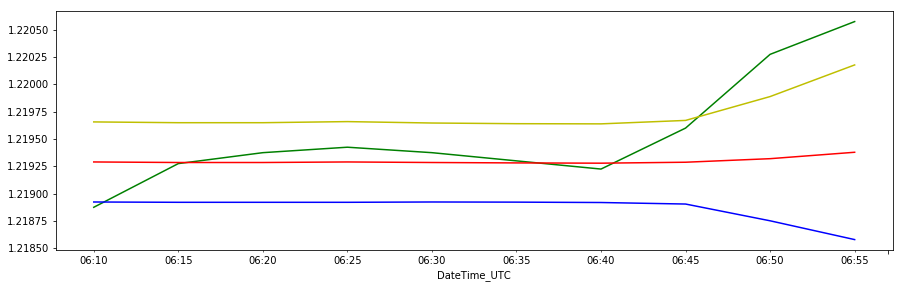

In [710]:
#%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(3,1,1)
# Close price
min_1_analyzed_df_line_chart["Close"].plot(ax=ax1, color="g")
#min_1_analyzed_df.iloc[rows_to_chart,3:4].plot(ax=ax1, color="g")
ax2 = plt.subplot(3,1,1)
# Middle band (20SMA)
min_1_analyzed_df_line_chart["Middle_Band"].plot(ax=ax1, color="r")
#min_1_analyzed_df.iloc[rows_to_chart,6:7].plot(ax=ax1, color="r")
ax3 = plt.subplot(3,1,1)
# Upper band
min_1_analyzed_df_line_chart["Upper_Band"].plot(ax=ax1, color="y")
#min_1_analyzed_df.iloc[rows_to_chart,7:8].plot(ax=ax1, color="y")
# Lower band
min_1_analyzed_df_line_chart["Lower_Band"].plot(ax=ax1, color="b")
#min_1_analyzed_df.iloc[rows_to_chart,8:9].plot(ax=ax1, color="b")
plt.show()

### Candlestick Chart

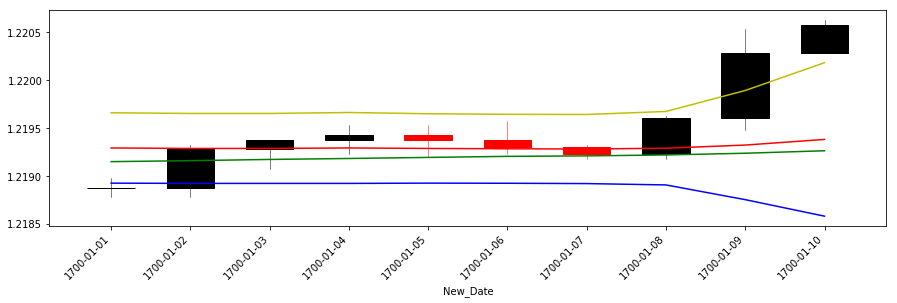

In [711]:
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12
hourFormatter = DateFormatter('%h')

fig1 = plt.figure(figsize=(15,15))
ax10 = plt.subplot(3,1,1)
fig1.subplots_adjust(bottom=0.2)
# ax10.xaxis.set_major_locator(mondays)
# ax10.xaxis.set_minor_locator(alldays)
# ax10.xaxis.set_major_formatter(dayFormatter)
ax10.xaxis.set_minor_formatter(hourFormatter)

candlestick_ohlc(ax10, zip(mdates.date2num(min_1_analyzed_df_candle_chart.index),
                         min_1_analyzed_df_candle_chart['Open'], min_1_analyzed_df_candle_chart['High'],
                         min_1_analyzed_df_candle_chart['Low'], min_1_analyzed_df_candle_chart['Close']), width=0.6)

min_1_analyzed_df_candle_chart["Middle_Band"].plot(ax=ax10, color="r")
min_1_analyzed_df_candle_chart["Upper_Band"].plot(ax=ax10, color="y")
min_1_analyzed_df_candle_chart["Lower_Band"].plot(ax=ax10, color="b")
min_1_analyzed_df_candle_chart["Seventy_SMA"].plot(ax=ax10, color="g")

ax10.xaxis_date()
ax10.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Calculating Factor's Profit and Loss

1. Change long_or_short
2. Change prices (high or low) in trd_price_and_prft

In [712]:
class long_or_short_cls:
    # Long = 0
    # Short = 1
    long_or_short = 0
    
class Pos_Open:
    is_position_open = False
    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False
        
class Prft_lss_calc:
    entry_value = 0
    exit_value = 0
    prft_lss = 0
    
    def round_down(self, n):
        return (np.floor(n*100))/100
        
    @classmethod
    def add_to_pos(cls, price):
        cls.entry_value = price*Trade_Size.size
#     def close_pos(cls, price):
#         cls.current_position += -price*Trade_Size.size
    def prft_lss_cal_stopped_out(self, price):
        self.exit_value = price*Trade_Size.size
        if long_or_short_cls.long_or_short == 0:
            self.prft_lss = self.round_down(self.exit_value - Prft_lss_calc.entry_value)
        else:
            self.prft_lss = self.round_down(Prft_lss_calc.entry_value - self.exit_value)
        return self.prft_lss
    
    def prft_lss_cal_took_prft(self):
        self.exit_value = Prft_lss_calc.entry_value+0.0009
        if long_or_short_cls.long_or_short == 0:
            self.prft_lss = self.round_down(self.exit_value - Prft_lss_calc.entry_value)
        else:
            self.prft_lss = self.round_down(Prft_lss_calc.entry_value - self.exit_value)
        return self.prft_lss
        
def trd_price_and_prft(row):
    
    p_l_calc = Prft_lss_calc()
    
    if (row.Action == "Entered") & (Pos_Open.is_position_open == False):
        p_l_calc.add_to_pos(row.High)
        Pos_Open.position_opened(True)
        return [row.High,0]
    
    elif ((row.Action == "Took Profit") | (row.Action == "Stopped Out")) & (Pos_Open.is_position_open == True):
#         Prft_lss_calc.close_pos(row.High)
        Pos_Open.position_opened(False)
        
        if row.Action == "Took Profit":
            return [(Prft_lss_calc.entry_value+0.0009), \
                    p_l_calc.prft_lss_cal_took_prft()]
        else:
            return [(row.Middle_Band - 0.0001), \
                    p_l_calc.prft_lss_cal_stopped_out(row.Middle_Band-0.0001)]
    
    else:
        return[np.NaN,0]

min_1_analyzed_df["Trade_Prc_and_Prft"] = min_1_analyzed_df.apply(trd_price_and_prft, axis=1)
min_1_analyzed_df["Trade_Prft_Lss"] = min_1_analyzed_df["Trade_Prc_and_Prft"].apply(lambda x: x[1])
min_1_analyzed_df.head(80)

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-01 06:10:00  1.218875  1.218975  1.218775  1.218875   
2018-03-01 06:15:00  1.218875  1.219325  1.218775  1.219275   
2018-03-01 06:20:00  1.219275  1.219375  1.219075  1.219375   
2018-03-01 06:25:00  1.219375  1.219525  1.219225  1.219425   
2018-03-01 06:30:00  1.219425  1.219525  1.219200  1.219375   
2018-03-01 06:35:00  1.219375  1.219575  1.219225  1.219300   
2018-03-01 06:40:00  1.219300  1.219325  1.219175  1.219225   
2018-03-01 06:45:00  1.219225  1.219625  1.219175  1.219600   
2018-03-01 06:50:00  1.219600  1.220525  1.219475  1.220275   
2018-03-01 06:55:00  1.220275  1.220625  1.220275  1.220575   
2018-03-01 07:00:00  1.220575  1.221125  1.220275  1.220925   
2018-03-01 07:05:00  1.220925  1.221050  1.220625  1.220725   
2018-03-01 07:10:00  1.220725  1.220950  1.219975  1.220475   
2018-03-01 07:15:00  1.220475  1.220850  1.220175  1.220425   
2018-03-01 07:20:00  1.220425  1.221075  1.220375  1.220975   
2018-03-01 07:25:00  1.220975  1.221325  1.220825  1.220825   
2018-03-01 07:30:00  1.220825  1.221025  1.220600  1.220775   
2018-03-01 07:35:00  1.220775  1.220975  1.220425  1.220450   
2018-03-01 07:40:00  1.220450  1.220925  1.220425  1.220875   
2018-03-01 07:45:00  1.220875  1.221175  1.220550  1.220825   
2018-03-01 07:50:00  1.220825  1.221175  1.220625  1.220925   
2018-03-01 07:55:00  1.220925  1.220925  1.220025  1.220075   
2018-03-01 08:00:00  1.220075  1.220425  1.219275  1.219675   
2018-03-01 08:05:00  1.219675  1.219775  1.219275  1.219675   
2018-03-01 08:10:00  1.219675  1.220075  1.219475  1.219825   
2018-03-01 08:15:00  1.219825  1.220425  1.219775  1.220025   
2018-03-01 08:20:00  1.220025  1.220575  1.219975  1.220075   
2018-03-01 08:25:00  1.220075  1.220375  1.220025  1.220225   
2018-03-01 08:30:00  1.220225  1.220375  1.219975  1.220025   
2018-03-01 08:35:00  1.220025  1.220175  1.219675  1.220025   
...                       ...       ...       ...       ...   
2018-03-01 10:20:00  1.218825  1.219175  1.218775  1.219150   
2018-03-01 10:25:00  1.219150  1.219325  1.218675  1.218875   
2018-03-01 10:30:00  1.218875  1.219125  1.218825  1.218875   
2018-03-01 10:35:00  1.218875  1.219075  1.218725  1.218925   
2018-03-01 10:40:00  1.218925  1.219275  1.218725  1.219225   
2018-03-01 10:45:00  1.219225  1.219425  1.219075  1.219125   
2018-03-01 10:50:00  1.219125  1.219625  1.219125  1.219225   
2018-03-01 10:55:00  1.219225  1.219425  1.218775  1.218775   
2018-03-01 11:00:00  1.218775  1.218825  1.218325  1.218375   
2018-03-01 11:05:00  1.218375  1.218775  1.218325  1.218475   
2018-03-01 11:10:00  1.218475  1.218575  1.218025  1.218500   
2018-03-01 11:15:00  1.218500  1.218525  1.218125  1.218275   
2018-03-01 11:20:00  1.218275  1.218725  1.218125  1.218725   
2018-03-01 11:25:00  1.218725  1.219025  1.218525  1.218575   
2018-03-01 11:30:00  1.218575  1.218725  1.218425  1.218675   
2018-03-01 11:35:00  1.218675  1.219025  1.218625  1.218825   
2018-03-01 11:40:00  1.218825  1.218925  1.218325  1.218425   
2018-03-01 11:45:00  1.218425  1.219025  1.218425  1.218575   
2018-03-01 11:50:00  1.218575  1.218625  1.218275  1.218450   
2018-03-01 11:55:00  1.218450  1.218825  1.218450  1.218475   
2018-03-01 12:00:00  1.218475  1.218675  1.218425  1.218675   
2018-03-01 12:05:00  1.218675  1.218875  1.218475  1.218475   
2018-03-01 12:10:00  1.218475  1.218725  1.218125  1.218175   
2018-03-01 12:15:00  1.218175  1.218275  1.217575  1.217700   
2018-03-01 12:20:00  1.217700  1.217750  1.217225  1.217425   
2018-03-01 12:25:00  1.217425  1.217525  1.217025  1.217100   
2018-03-01 12:30:00  1.217100  1.217600  1.216975  1.217450   
2018-03-01 12:35:00  1.217450  1.217675  1.217400  1.217575   
2018-03-01 12:40:00  1.217575  1.217725  1.217100  1.217275   
2018-03-01 12:45:00  1.217275  1.217275  1.216475  1.216575   

                    Trading_date_Actual_Time Trading_da

In [713]:
min_1_analyzed_df_dist_analysis = min_1_analyzed_df[min_1_analyzed_df["Action"] != "Waiting"]
min_1_analyzed_df_dist_analysis

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-02 08:55:00  1.227525  1.227825  1.227325  1.227425   
2018-03-02 09:10:00  1.226825  1.226875  1.226225  1.226525   
2018-03-06 21:35:00  1.240675  1.240825  1.240575  1.240775   
2018-03-06 21:55:00  1.240550  1.240575  1.240400  1.240425   
2018-03-07 21:00:00  1.241275  1.241350  1.241175  1.241325   
2018-03-07 21:50:00  1.241275  1.241275  1.241025  1.241075   
2018-03-09 05:20:00  1.231225  1.231375  1.231200  1.231325   
2018-03-09 06:15:00  1.231800  1.231850  1.231375  1.231525   
2018-03-12 03:55:00  1.232050  1.232350  1.232025  1.232300   
2018-03-12 04:10:00  1.232200  1.232200  1.232100  1.232150   
2018-03-12 04:50:00  1.232350  1.232500  1.232325  1.232400   
2018-03-12 05:05:00  1.232300  1.232325  1.232125  1.232250   
2018-03-14 03:30:00  1.240725  1.240750  1.240425  1.240450   
2018-03-14 03:35:00  1.240450  1.240475  1.240300  1.240400   
2018-03-14 05:00:00  1.240725  1.240825  1.240700  1.240800   
2018-03-14 05:50:00  1.240800  1.240825  1.240525  1.240525   
2018-03-16 03:50:00  1.230875  1.231025  1.230725  1.230900   
2018-03-16 04:35:00  1.231025  1.231075  1.230825  1.231075   
2018-03-16 06:20:00  1.231425  1.231650  1.231425  1.231575   
2018-03-16 07:00:00  1.231825  1.231825  1.231325  1.231475   
2018-03-21 06:50:00  1.226925  1.227275  1.226925  1.227125   
2018-03-21 08:55:00  1.228375  1.228475  1.227775  1.227975   
2018-03-22 04:15:00  1.236275  1.236525  1.236275  1.236450   
2018-03-22 04:40:00  1.236225  1.236225  1.235975  1.236025   
2018-03-23 05:20:00  1.233575  1.233775  1.233575  1.233600   
2018-03-23 05:55:00  1.233550  1.233550  1.233125  1.233175   
2018-03-27 20:25:00  1.240325  1.240450  1.240325  1.240400   
2018-03-27 20:35:00  1.240375  1.240375  1.240175  1.240300   
2018-03-29 03:55:00  1.232675  1.232800  1.232675  1.232800   
2018-03-29 05:00:00  1.233025  1.233025  1.232675  1.232725   
...                       ...       ...       ...       ...   
2018-04-17 18:55:00  1.236625  1.236825  1.236525  1.236775   
2018-04-17 19:00:00  1.236775  1.236875  1.236525  1.236575   
2018-04-17 19:55:00  1.237025  1.237275  1.236875  1.237225   
2018-04-17 20:50:00  1.237375  1.237400  1.237025  1.237025   
2018-04-18 05:05:00  1.237725  1.237825  1.237575  1.237650   
2018-04-18 05:10:00  1.237650  1.237700  1.237600  1.237625   
2018-04-18 16:50:00  1.238725  1.238925  1.238475  1.238725   
2018-04-18 17:20:00  1.238475  1.238525  1.238275  1.238325   
2018-04-24 05:20:00  1.221725  1.221775  1.221575  1.221625   
2018-04-24 06:00:00  1.221650  1.221750  1.221325  1.221600   
2018-04-30 05:45:00  1.213375  1.213575  1.213225  1.213550   
2018-04-30 06:00:00  1.213650  1.213650  1.212950  1.213175   
2018-05-02 03:35:00  1.200875  1.201125  1.200775  1.200925   
2018-05-02 03:50:00  1.200850  1.200850  1.200475  1.200525   
2018-05-03 03:35:00  1.198500  1.198750  1.198325  1.198325   
2018-05-03 03:50:00  1.198125  1.198175  1.197900  1.197900   
2018-05-08 20:30:00  1.186450  1.186650  1.186425  1.186575   
2018-05-08 20:55:00  1.186650  1.186650  1.186300  1.186475   
2018-05-11 04:25:00  1.191775  1.191950  1.191775  1.191925   
2018-05-11 04:40:00  1.191725  1.191725  1.191525  1.191575   
2018-05-14 09:25:00  1.198425  1.198825  1.198325  1.198575   
2018-05-14 09:45:00  1.198425  1.198475  1.197675  1.197775   
2018-05-16 05:35:00  1.183425  1.183525  1.183175  1.183525   
2018-05-16 06:10:00  1.183575  1.184350  1.183375  1.184300   
2018-05-24 04:30:00  1.170725  1.170875  1.170550  1.170875   
2018-05-24 04:55:00  1.170925  1.170975  1.170625  1.170925   
2018-05-28 19:05:00  1.162800  1.162825  1.162625  1.162650   
2018-05-28 19:10:00  1.162650  1.162750  1.162650  1.162725   
2018-05-31 20:45:00  1.169550  1.169700  1.169475  1.169650   
2018-05-31 20:55:00  1.169625  1.169650  1.169125  1.169350   

                    Trading_date_Actual_Time Trading_da

### P&L time distribution

#### Prep

In [714]:
min_1_analyzed_df_dist_analysis["Trade_Entry_Time"] = min_1_analyzed_df_dist_analysis.index
min_1_analyzed_df_dist_analysis["Trade_Entry_Time_Shifted"] = min_1_analyzed_df_dist_analysis["Trade_Entry_Time"].shift(1)
min_1_analyzed_df_dist_analysis.drop("Trade_Entry_Time",axis=1, inplace=True)
min_1_analyzed_df_dist_analysis_exists_only = min_1_analyzed_df_dist_analysis.loc[min_1_analyzed_df_dist_analysis \
["Action"] == "Took Profit",:]
min_1_analyzed_df_dist_analysis_exists_only["Hour_of_Entry"] = min_1_analyzed_df_dist_analysis_exists_only \
["Trade_Entry_Time_Shifted"].apply(lambda x: x.hour)

c:\python 3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python 3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python 3.7\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
c

In [715]:
min_1_analyzed_df_dist_analysis_exists_only

Open      High       Low     Close  \
DateTime_UTC                                                  
2018-03-02 09:10:00  1.226825  1.226875  1.226225  1.226525   
2018-03-06 21:55:00  1.240550  1.240575  1.240400  1.240425   
2018-03-07 21:50:00  1.241275  1.241275  1.241025  1.241075   
2018-03-09 06:15:00  1.231800  1.231850  1.231375  1.231525   
2018-03-12 04:10:00  1.232200  1.232200  1.232100  1.232150   
2018-03-12 05:05:00  1.232300  1.232325  1.232125  1.232250   
2018-03-14 03:35:00  1.240450  1.240475  1.240300  1.240400   
2018-03-14 05:50:00  1.240800  1.240825  1.240525  1.240525   
2018-03-16 04:35:00  1.231025  1.231075  1.230825  1.231075   
2018-03-16 07:00:00  1.231825  1.231825  1.231325  1.231475   
2018-03-21 08:55:00  1.228375  1.228475  1.227775  1.227975   
2018-03-22 04:40:00  1.236225  1.236225  1.235975  1.236025   
2018-03-23 05:55:00  1.233550  1.233550  1.233125  1.233175   
2018-03-27 20:35:00  1.240375  1.240375  1.240175  1.240300   
2018-03-29 05:00:00  1.233025  1.233025  1.232675  1.232725   
2018-03-30 04:50:00  1.231350  1.231400  1.230975  1.231275   
2018-03-30 12:05:00  1.232675  1.232725  1.232575  1.232650   
2018-03-30 12:45:00  1.232800  1.232825  1.232675  1.232725   
2018-04-02 10:00:00  1.233150  1.233150  1.232975  1.232975   
2018-04-03 04:25:00  1.230625  1.230775  1.230625  1.230725   
2018-04-03 05:10:00  1.230825  1.230825  1.230575  1.230700   
2018-04-04 04:50:00  1.228225  1.228225  1.228075  1.228125   
2018-04-06 03:25:00  1.224775  1.224825  1.224325  1.224375   
2018-04-11 05:45:00  1.236500  1.236625  1.236425  1.236625   
2018-04-13 18:25:00  1.233325  1.233375  1.233125  1.233275   
2018-04-16 19:05:00  1.238075  1.238075  1.237775  1.237875   
2018-04-17 19:00:00  1.236775  1.236875  1.236525  1.236575   
2018-04-17 20:50:00  1.237375  1.237400  1.237025  1.237025   
2018-04-18 05:10:00  1.237650  1.237700  1.237600  1.237625   
2018-04-18 17:20:00  1.238475  1.238525  1.238275  1.238325   
2018-04-24 06:00:00  1.221650  1.221750  1.221325  1.221600   
2018-04-30 06:00:00  1.213650  1.213650  1.212950  1.213175   
2018-05-02 03:50:00  1.200850  1.200850  1.200475  1.200525   
2018-05-03 03:50:00  1.198125  1.198175  1.197900  1.197900   
2018-05-08 20:55:00  1.186650  1.186650  1.186300  1.186475   
2018-05-11 04:40:00  1.191725  1.191725  1.191525  1.191575   
2018-05-14 09:45:00  1.198425  1.198475  1.197675  1.197775   
2018-05-16 06:10:00  1.183575  1.184350  1.183375  1.184300   
2018-05-24 04:55:00  1.170925  1.170975  1.170625  1.170925   
2018-05-28 19:10:00  1.162650  1.162750  1.162650  1.162725   
2018-05-31 20:55:00  1.169625  1.169650  1.169125  1.169350   

                    Trading_date_Actual_Time Trading_date_Sequential_Time  \
DateTime_UTC                                                                
2018-03-02 09:10:00                 09:10:00                     10:55:00   
2018-03-06 21:55:00                 21:55:00                     23:40:00   
2018-03-07 21:50:00                 21:50:00                     23:35:00   
2018-03-09 06:15:00                 06:15:00                     08:00:00   
2018-03-12 04:10:00                 04:10:00                     06:55:00   
2018-03-12 05:05:00                 05:05:00                     07:50:00   
2018-03-14 03:35:00                 03:35:00                     06:20:00   
2018-03-14 05:50:00                 05:50:00                     08:35:00   
2018-03-16 04:35:00                 04:35:00                     07:20:00   
2018-03-16 07:00:00                 07:00:00                     09:45:00   
2018-03-21 08:55:00                 08:55:00                     11:40:00   
2018-03-22 04:40:00                 04:40:00                     07:25:00   
2018-03-23 05:55:00                 05:55:00                     08:40:00   
2018-03-27 20:35:00                 20:35:00                     23:20:00   
2018-03-29 05:00:00                 05:00:00                     07:45:00   
2018-0

#### Time distribution of Profits

AxesSubplot(0.125,0.125;0.775x0.755)


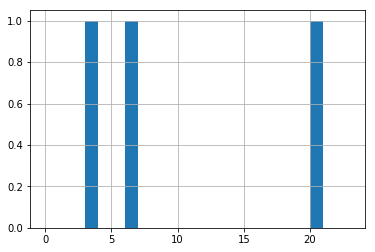

In [716]:
print(min_1_analyzed_df_dist_analysis_exists_only[min_1_analyzed_df_dist_analysis_exists_only["Trade_Prft_Lss"]>0] \
["Hour_of_Entry"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,23]))

#### Time distribution of losses

AxesSubplot(0.125,0.125;0.775x0.755)


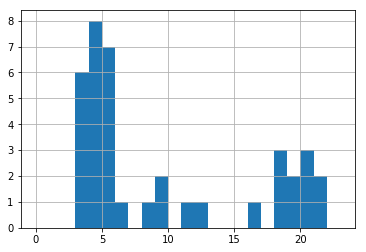

In [717]:
print(min_1_analyzed_df_dist_analysis_exists_only[min_1_analyzed_df_dist_analysis_exists_only["Trade_Prft_Lss"]<=0] \
["Hour_of_Entry"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))

## Result (P & L)

# of Trades: 41
        Count    Average
Loss       38  -7.537105
Profit      3  14.500000
Gross P&L: -242.91 (-1.21455%)
Commission: 82
Slippage: 82.0
Net P&L: -406.90999999999997 (-2.03455%)


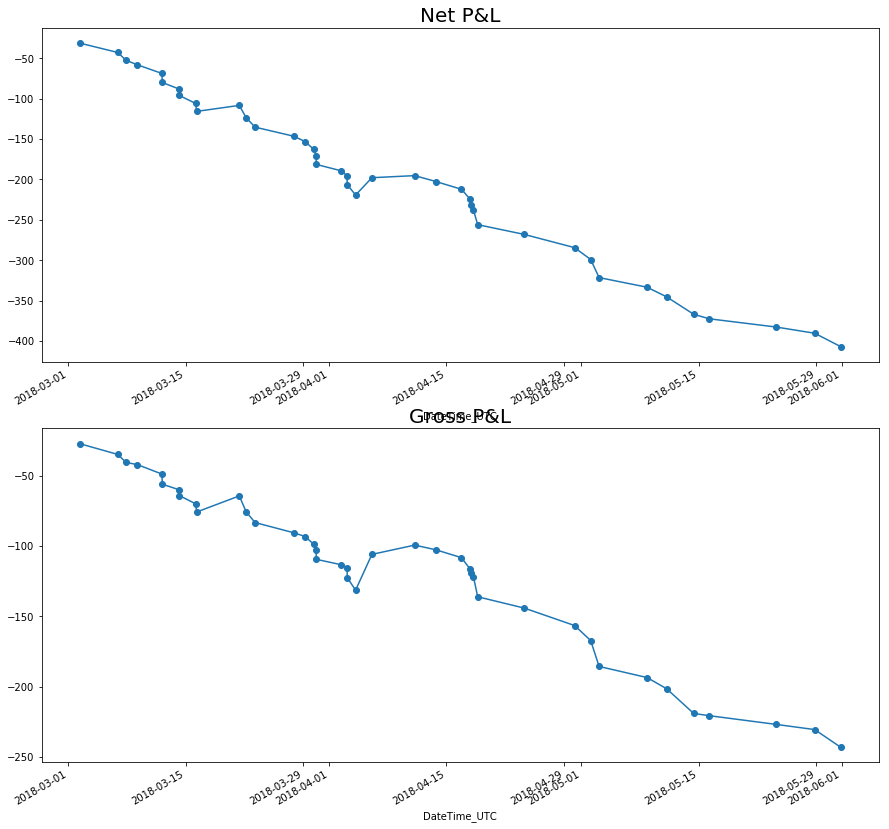

In [718]:
# Gross P&L:
gross_absolute_profit_loss = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].sum()
gross_percent_profit_loss = (gross_absolute_profit_loss/Trade_Size.size)*100

# Commission:
commission = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*2

#Slippage:
slippage = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*(Trade_Size.size/10000)

# Net P&L:
net_absolute_profit_loss = gross_absolute_profit_loss - commission - slippage
net_percent_profit_loss = (net_absolute_profit_loss/Trade_Size.size)*100

# Number of trades:
num_of_trades = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()

profit_vs_loss = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"] > 0
profit_vs_loss.replace({True:"Profit",False:"Loss"}, inplace=True)
s = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"]
P_N_L_Stats = pd.DataFrame({"Count":profit_vs_loss.value_counts().values,"Average":[s[s<0].mean(), 
s[s>0].mean()]},index=profit_vs_loss.value_counts().index)

print("# of Trades: {}".format(num_of_trades))
print(P_N_L_Stats)
print("Gross P&L: {} ({}%)".format(gross_absolute_profit_loss,gross_percent_profit_loss))
print("Commission: {}".format(commission))
print("Slippage: {}".format(slippage))
print("Net P&L: {} ({}%)".format(net_absolute_profit_loss,net_percent_profit_loss))

# Charting P&L:
pnl_chart_df = min_1_analyzed_df["Trade_Prft_Lss"].replace(0,np.NaN)
pnl_chart_df_cumsum = pnl_chart_df[pnl_chart_df < 1000000000].cumsum()
pnl_chart_df_less_comm_and_slip = pnl_chart_df - 2 - Trade_Size.size/10000
pnl_chart_df_less_comm_and_slip_cumsum = pnl_chart_df_less_comm_and_slip[pnl_chart_df_less_comm_and_slip < 1000000000].cumsum()

fig1 = plt.figure(figsize=(15,15))
ax4 = plt.subplot(2,1,1)
ax4.set_title("Net P&L", fontsize=20)
pnl_chart_df_less_comm_and_slip_cumsum.plot(ax=ax4, linestyle="-", marker="o")
ax5 = plt.subplot(2,1,2)
ax5.set_title("Gross P&L", fontsize=20)
pnl_chart_df_cumsum.plot(ax=ax5, linestyle="-", marker="o")
plt.show()
# ax2 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA10"].head(100).plot(ax=ax1, color="r")
# ax3 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA20"].head(100).plot(ax=ax1, color="y")